1. Use KNN model on Indian diabetes patients database and predict whether a new patient is diabetic(1) or not(0).

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/hackthebox/Downloads/Machine-Learning-Self-Study/KNN_CLASSIFIER/Data/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Some data has filled in 0,we replace 0 in help of mean value (average)

In [4]:
col_list = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [5]:
for i in col_list:
    df[i] = df[i].replace(0,np.NaN)
    mean = int(df[i].mean(skipna=True))
    df[i] = df[i].replace(np.NaN,mean)

In [7]:
x = df.iloc[:,:8]
y = df.iloc[:,8]

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
k_range = range(1,20)
scores = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    accuracy = model.score(x_test,y_test)
    scores.append(accuracy)
    print('k= %d Accuracy= %.2f%%' %(k,accuracy*100))

k= 1 Accuracy= 65.58%
k= 2 Accuracy= 72.08%
k= 3 Accuracy= 72.73%
k= 4 Accuracy= 76.62%
k= 5 Accuracy= 75.32%
k= 6 Accuracy= 76.62%
k= 7 Accuracy= 75.97%
k= 8 Accuracy= 76.62%
k= 9 Accuracy= 75.32%
k= 10 Accuracy= 75.32%
k= 11 Accuracy= 75.97%
k= 12 Accuracy= 75.97%
k= 13 Accuracy= 78.57%
k= 14 Accuracy= 79.22%
k= 15 Accuracy= 77.27%
k= 16 Accuracy= 75.32%
k= 17 Accuracy= 76.62%
k= 18 Accuracy= 76.62%
k= 19 Accuracy= 78.57%


Text(0, 0.5, 'Testing Accuracy')

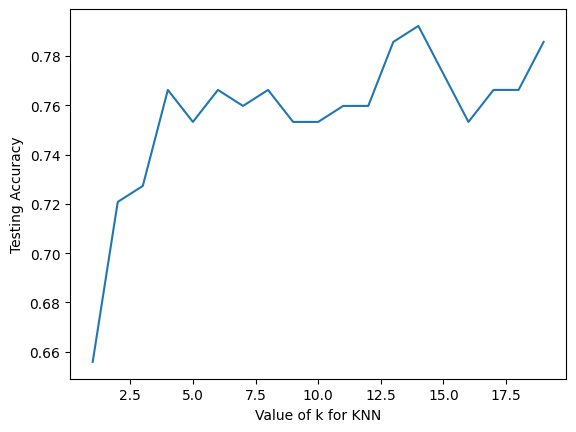

In [10]:
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')

In [13]:
# take k = 14
model = KNeighborsClassifier(n_neighbors=14,metric='euclidean')
model.fit(x_train,y_train)
accuracy = model.score(x_test,y_test)
accuracy

0.7922077922077922

- Test Data = Pregnancies=1,Glucose=189,BloodPressure=60,SkinThickness=23,Insulin=846,BMI=30.1,DiabetesPedigreeFunction=0.398,Age=59,outcome=?	

In [14]:
model.predict([[1,189,60,23,846,30.1,0.398,59]])

array([1])

- Has diabetic

In [15]:
model.predict([[3,126,88,41,235,39.3,0.704,27]])

array([0])

- No Diabetic